In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Excel
df = pd.read_excel("Updated_BMS_Data_2.xlsx", sheet_name="Sheet1", engine="openpyxl", header=0, skiprows=0, nrows=6109)

#Drop first column
df = df.iloc[:, 1:]


# Separate features and target
X = df.drop(columns=["tbsagrft"])
y = df["tbsagrft"]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#Scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

# Transform both training and testing data
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)


# Train linear regression using XGBoost
model = XGBRegressor(objective="reg:squarederror", booster="gblinear")
model.fit(X_train_normalized, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_normalized)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 96.94679586991872
R² Score: 0.7278679952170568


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load your Excel file (update sheet name if needed)
df = pd.read_excel("Updated_BMS_Data_2.xlsx", sheet_name="Sheet1", engine="openpyxl", header=0, skiprows=0, nrows=6109)

#Drop first column
df = df.iloc[:, 1:]


# Separate features and target
X = df.drop(columns=["tbsagrft"])
y = df["tbsagrft"]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

# Transform both training and testing data
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train tree using XGBoost
model = XGBRegressor(
    objective="reg:squarederror",
    booster="gbtree",         # this is the tree model
    n_estimators=100,         # number of trees
    learning_rate=0.1,        # shrinkage to prevent overfitting
    max_depth=6,              # controls tree complexity
    random_state=42
)
model.fit(X_train_normalized, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_normalized)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 71.35727606604488
R² Score: 0.7996983972759841


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


      Feature  SHAP Importance
1     tbsabrn         9.629733
5    numtrpor         3.604486
0         age         1.656513
2  days_disch         0.651099
6      romdef         0.648712
4     pretiol         0.613002
3    daysvent         0.423947
7    sfa2_pre         0.214338


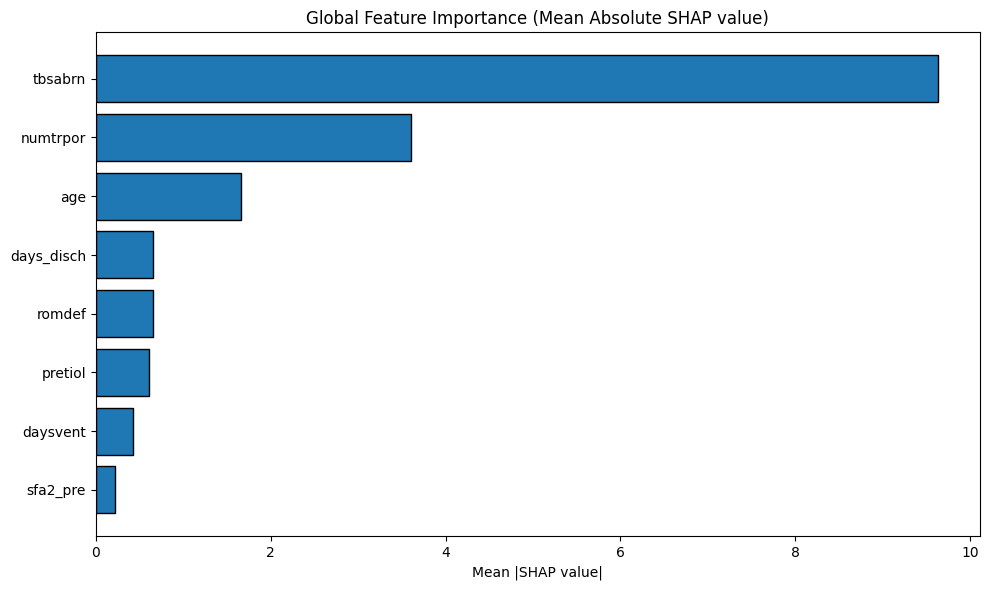

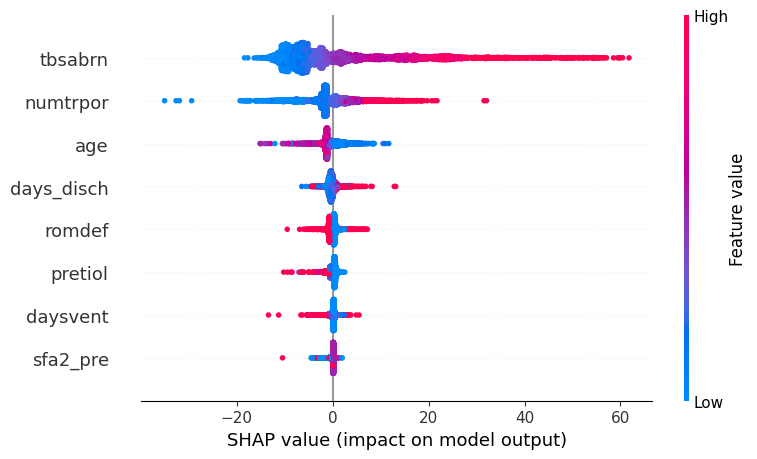

In [3]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Re-link feature names to scaled data
feature_names = X.columns
X_train_df = pd.DataFrame(X_train_normalized, columns=feature_names)

# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_df)

# Compute mean absolute SHAP values per feature
shap_vals_array = np.abs(shap_values)
mean_shap_vals = shap_vals_array.mean(axis=0)

# Create DataFrame with importance scores
shap_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Importance': mean_shap_vals
}).sort_values(by='SHAP Importance', ascending=False)

# Display the feature importance DataFrame
print(shap_df)

# Plot bar chart of SHAP importances
plt.figure(figsize=(10, 6))
plt.barh(shap_df['Feature'], shap_df['SHAP Importance'], edgecolor='black')
plt.gca().invert_yaxis()
plt.title("Global Feature Importance (Mean Absolute SHAP value)")
plt.xlabel("Mean |SHAP value|")
plt.tight_layout()
plt.show()

# SHAP beeswarm summary plot
shap.summary_plot(shap_values, X_train_df, max_display=15)




📌 Feature: age
----------------------------------------


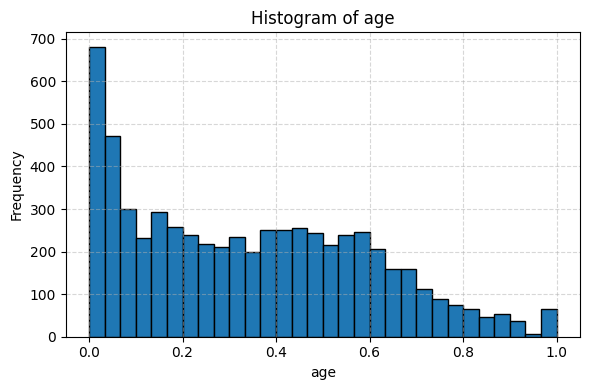

count    6109.000000
mean        0.343389
std         0.252168
min         0.000000
25%         0.110122
50%         0.321632
75%         0.539049
max         1.000000
Name: age, dtype: float64

📌 Feature: tbsabrn
----------------------------------------


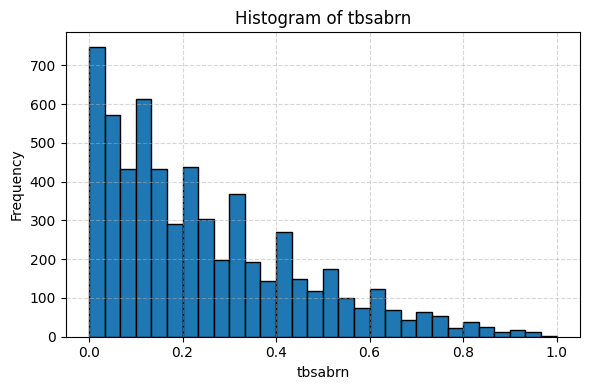

count    6109.000000
mean        0.244627
std         0.205741
min         0.000000
25%         0.080402
50%         0.190955
75%         0.361809
max         1.000000
Name: tbsabrn, dtype: float64

📌 Feature: days_disch
----------------------------------------


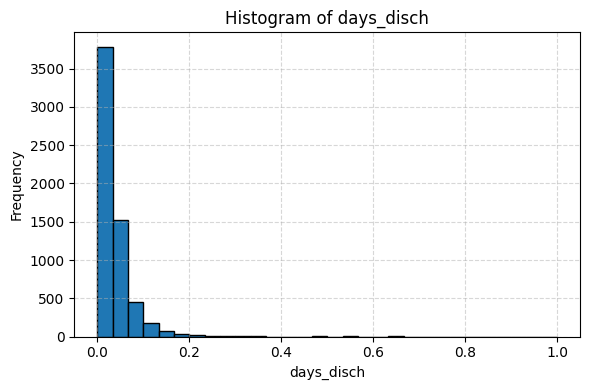

count    6109.000000
mean        0.037913
std         0.043069
min         0.000000
25%         0.015873
50%         0.027417
75%         0.046176
max         1.000000
Name: days_disch, dtype: float64

📌 Feature: daysvent
----------------------------------------


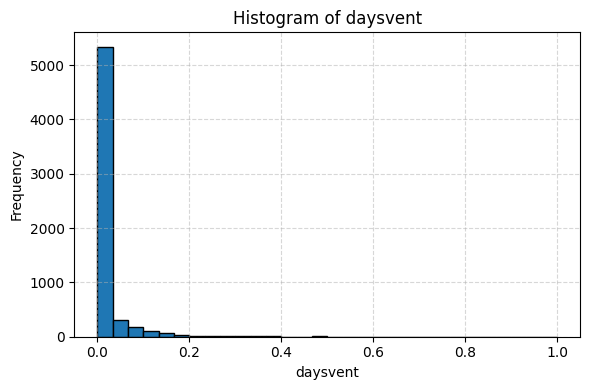

count    6109.000000
mean        0.016122
std         0.049683
min         0.000000
25%         0.000000
50%         0.000000
75%         0.008197
max         1.000000
Name: daysvent, dtype: float64

📌 Feature: pretiol
----------------------------------------


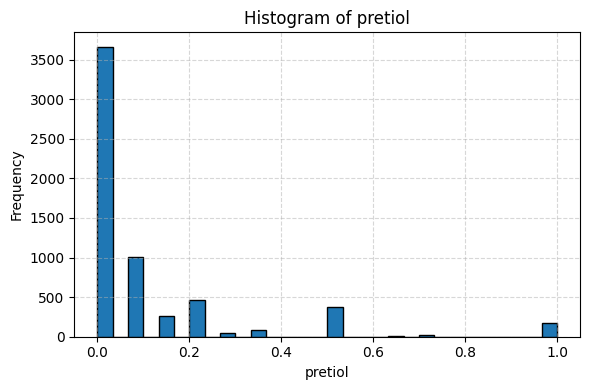

count    6109.000000
mean        0.104191
std         0.207772
min         0.000000
25%         0.000000
50%         0.000000
75%         0.071429
max         1.000000
Name: pretiol, dtype: float64

📌 Feature: numtrpor
----------------------------------------


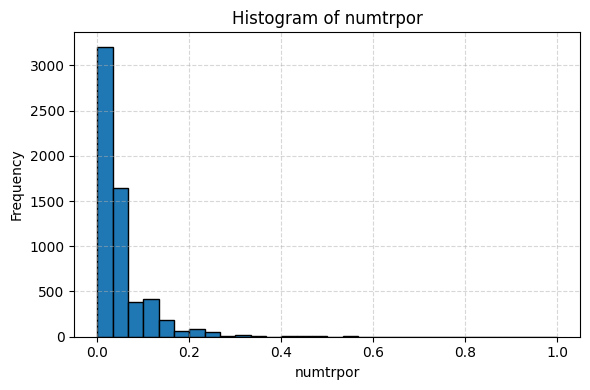

count    6109.000000
mean        0.049491
std         0.061027
min         0.000000
25%         0.020000
50%         0.020000
75%         0.060000
max         1.000000
Name: numtrpor, dtype: float64

📌 Feature: romdef
----------------------------------------


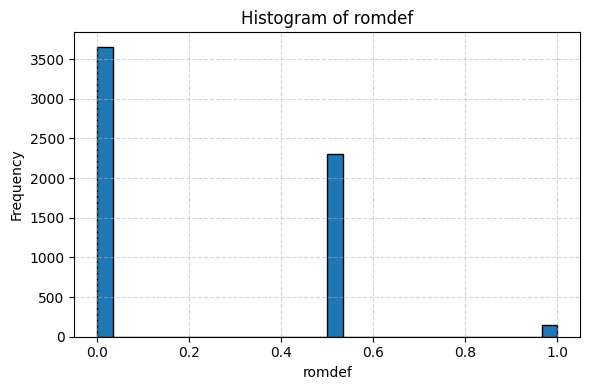

count    6109.000000
mean        0.212964
std         0.270654
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max         1.000000
Name: romdef, dtype: float64

📌 Feature: sfa2_pre
----------------------------------------


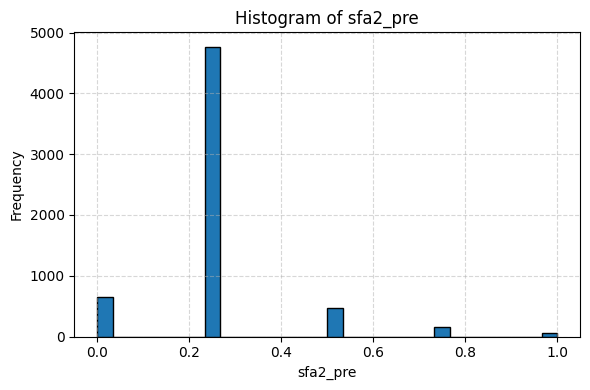

count    6109.000000
mean        0.262768
std         0.152073
min         0.000000
25%         0.250000
50%         0.250000
75%         0.250000
max         1.000000
Name: sfa2_pre, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Loop through each feature in the original (unscaled) X
for col in X.columns:
    print(f"\n📌 Feature: {col}")
    print("-" * 40)

    # Plot histogram
    plt.figure(figsize=(6, 4))
    plt.hist(X[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Print descriptive stats
    print(X[col].describe())
